# Exploring NYC DEP's Citywide Parcel-Based Impervious Area GIS Study

Author: Mark Bauer

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import urllib

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Printing versions of Python modules and packages with watermark - the IPython magic extension.  
Documention for installing watermark: https://github.com/rasbt/watermark

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2
seaborn   : 0.11.2



![dataset-page](images/dataset-page.png)

Screenshot of dataset on NYC Open Data.




Link to dataset page: https://data.cityofnewyork.us/City-Government/DEP-s-Citywide-Parcel-Based-Impervious-Area-GIS-St/uex9-rfq8

# Download Data Dictionary and Webinar Materials

In [3]:
# url of data dictionary
url = 'https://data.cityofnewyork.us/api/views/uex9-rfq8/files/65cd2ea4-8c0b-4eaa-9290-71852fb2b573?\
download=true&filename=Data_Dictionary_ImperviousData.xlsx'

file_name = 'data-dictionary/Data_Dictionary_ImperviousData.xlsx'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls data-dictionary/

Data_Dictionary_ImperviousData.xlsx


In [4]:
# url of webinar presentation
url = 'https://data.cityofnewyork.us/api/views/uex9-rfq8/files/5d63cf10-e6c3-44d0-8d67-c89c7632d0e6?\
download=true\
&filename=DEP%E2%80%99s%20Citywide%20Parcel-Based%20Impervious%20Area%20Study%20Webinar_June%2023%202020.pdf'

file_name = 'data-dictionary/DEP-Citywide-Parcel-Based-Impervious-Area-Study-Webinar_June-23-2020.pdf'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls data-dictionary/

DEP-Citywide-Parcel-Based-Impervious-Area-Study-Webinar_June-23-2020.pdf
Data_Dictionary_ImperviousData.xlsx


In [5]:
# url of webinar video
url = 'https://data.cityofnewyork.us/api/views/uex9-rfq8/files/871746b1-930a-4d0c-b4b2-fc4f66edd565?\
download=true\
&filename=2020-06-23%2013.35%20NYC%20Impervious%20Area%20GIS%20Analysis%20Webinar.mp4'

file_name = 'data-dictionary/2020-06-23-13.35-NYC-Impervious-Area-GIS-Analysis-Webinar.mp4'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls data-dictionary/

2020-06-23-13.35-NYC-Impervious-Area-GIS-Analysis-Webinar.mp4
DEP-Citywide-Parcel-Based-Impervious-Area-Study-Webinar_June-23-2020.pdf
Data_Dictionary_ImperviousData.xlsx


# Manhattan

In [6]:
# url of webinar video
url = 'https://data.cityofnewyork.us/api/views/uex9-rfq8/files/d4087869-50f2-4dcb-a063-0d076f39ef4a?\
download=true&filename=Manhattan.gdb.zip'

file_name = 'data/Manhattan.gdb.zip'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls data/

Manhattan.gdb.zip


In [7]:
# read data as a dataframe
path = 'data/Manhattan.gdb.zip'
gdf = gpd.read_file(path)

# preview data
print('shape of data: {}'.format(gdf.shape))
gdf.head()

shape of data: (711429, 14)


,Grade,Block,Lot,CD,Borough,BBL,Class,create_name,create_date,edit_name,edit_date,SHAPE_Length,SHAPE_Area,geometry
0,Impervious,3,1,101.0,MN,1.000030e+09,concrete,Arup,2020-03-10 22:15:21+00:00,None,NaT,6.530197,0.007548,"MULTIPOLYGON (((979601.849 195246.000, 979601...."
1,Impervious,29,7501,101.0,MN,1.000298e+09,concrete,Arup,2020-03-10 22:15:21+00:00,None,NaT,1.799829,0.002396,"MULTIPOLYGON (((981366.000 196148.387, 981366...."
2,Impervious,84,36,101.0,MN,1.000840e+09,concrete,Arup,2020-03-10 22:15:21+00:00,None,NaT,1.640895,0.002015,"MULTIPOLYGON (((980974.000 199132.370, 980974...."
3,Impervious,87,1,101.0,MN,1.000870e+09,concrete,Arup,2020-03-10 22:15:21+00:00,None,NaT,0.044873,0.000060,"MULTIPOLYGON (((981664.376 198486.494, 981664...."
4,Impervious,199,11,103.0,MN,1.001990e+09,concrete,Arup,2020-03-10 22:15:21+00:00,None,NaT,4.744043,0.006111,"MULTIPOLYGON (((984400.000 200554.665, 984401...."


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 711429 entries, 0 to 711428
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Grade         711429 non-null  object             
 1   Block         711429 non-null  int64              
 2   Lot           711429 non-null  int64              
 3   CD            710824 non-null  float64            
 4   Borough       711429 non-null  object             
 5   BBL           711429 non-null  float64            
 6   Class         711429 non-null  object             
 7   create_name   711429 non-null  object             
 8   create_date   711429 non-null  datetime64[ns, UTC]
 9   edit_name     0 non-null       object             
 10  edit_date     0 non-null       datetime64[ns]     
 11  SHAPE_Length  711429 non-null  float64            
 12  SHAPE_Area    711429 non-null  float64            
 13  geometry      711429 non-null  geome

In [9]:
gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
gdf['Grade'].value_counts()

Impervious       572048
Pervious         117697
Semi-Pervious     21254
Open water          430
Name: Grade, dtype: int64

In [11]:
gdf['Class'].value_counts()

asphalt           277111
roof              118275
concrete          106985
tree               74188
metal              56331
grass              28542
bush               14956
bare soil          10506
gravel              8886
wood                6071
brick paver         3208
water               2122
synthetic turf      1862
rock                1567
open water           430
other                337
pool                  41
sand                  11
Name: Class, dtype: int64

In [12]:
gdf['create_name'].value_counts()

Arup    711429
Name: create_name, dtype: int64

CPU times: user 4min, sys: 2.82 s, total: 4min 3s
Wall time: 4min 4s


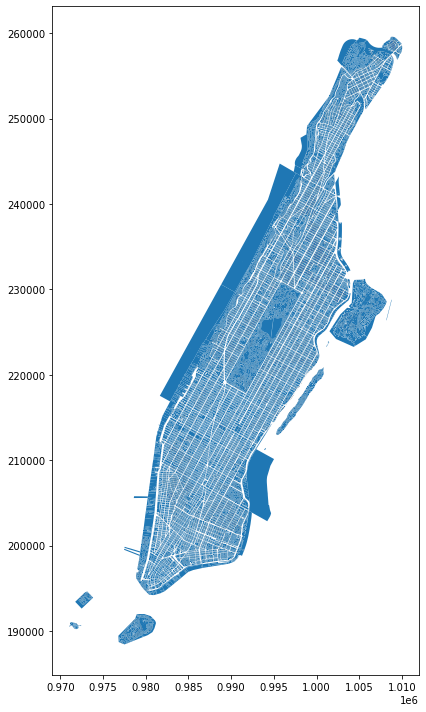

In [13]:
%%time

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax)

plt.tight_layout()